In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/tmp/ipykernel_4467/2346210856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_needed_noise0['correct'] = results_needed_noise0['correct'].apply(lambda x: 100 * x)


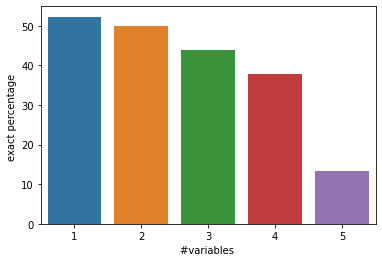

In [94]:
## include results 

results = pd.read_csv("random_results.xlsx")

results_needed_noise0 = results[["group", "size", "size_class", "vars", "true model",  "time", "correct ind", "correct"]]
results_needed_noise0['correct'] = results_needed_noise0['correct'].apply(lambda x: 100 * x)

sns.barplot(x='vars',y='correct', data=results_needed_noise0, ci=None)

results_needed_noise0_gb_vars = results_needed_noise0.groupby(["vars"]).aggregate( {"correct": "mean"} )
results_needed_noise0_gb_vars

plt.xlabel("#variables ")
plt.ylabel("exact percentage ")
plt.savefig("numvars_vs_exact_correct_no_noise.eps")


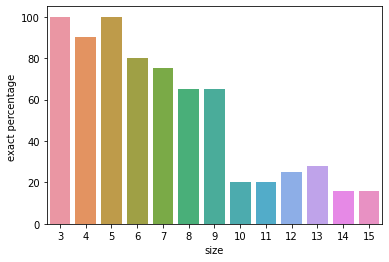

In [95]:
######################## exact percentages w.r.t. size of exact models ==> no noisy data

results_needed_noise0_reset = results_needed_noise0.reset_index()
#results_needed_noise0_reset['correct'] = results_needed_noise0_reset['correct'].apply(lambda x: 100*x)
sns.barplot(x='size',y='correct', data=results_needed_noise0_reset, ci=None)

results_needed_noise0_gb_size = results_needed_noise0.groupby(["size"]).aggregate( {"correct": "mean"} )
#results_needed_noise0['correct'] = results_needed_noise0['correct'].apply(lambda x: 100*x, axis = 0)
results_needed_noise0_gb_size

plt.xlabel("size")
plt.ylabel("exact percentage ")
plt.savefig("numsize_vs_exact_correct_no_noise.eps")  

,time
vars,
1,77.578462
2,104.341667
3,121.476000
4,157.157778
5,204.066667


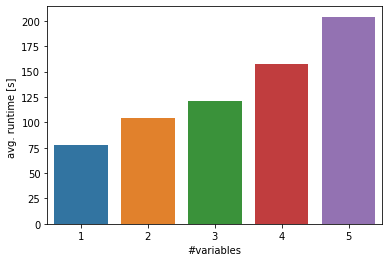

In [96]:
##################  exact percentages w.r.t. runtime

sns.barplot(x='vars', y='time', data=results_needed_noise0, ci=None)
plt.xlabel("#variables")
plt.ylabel("avg. runtime [s] ")
plt.savefig("numsize_vs_time_no_noise.eps")  
# numerical results
results_needed_noise0_time  = results_needed_noise0.groupby(["vars"]).aggregate({"time" : "mean"})
results_needed_noise0_time

['group', 'size', 'size_class', 'vars', 'true model', 'time.1', 'correct.1']


/tmp/ipykernel_4467/2351392583.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_needed_noise_level[cols_expected[-1]] = results_needed_noise_level[cols_expected[-1]].apply(lambda x: 100*x)


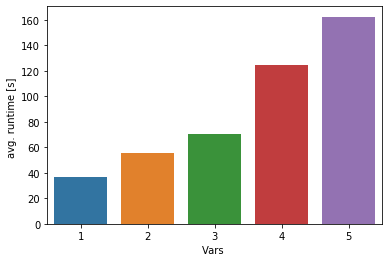

In [101]:
############ noisy data plots:
NOISE_LEVEL = 0.001
cols_expected = ["group", "size", "size_class", "vars", "true model" ]

#additional columns depending of noise level:
index = ""
if NOISE_LEVEL == 0.001:
    index = ".1"
else:
    index =".2"

cols_expected.append("time" + index)
cols_expected.append("correct" + index)
print(cols_expected)
#results.info()
results_needed_noise_level = results[cols_expected]
## transform to percentages 
results_needed_noise_level[cols_expected[-1]] = results_needed_noise_level[cols_expected[-1]].apply(lambda x: 100*x)
results_needed_noise_level

#### VARS vs. exact precission:
sns.barplot(x = "vars", y = cols_expected[-1], data = results_needed_noise_level, ci=None )
###### customize the plot:
plt.xlabel("#variables ")
plt.ylabel("exact percentage ")
plt.savefig("numvars_vs_exact_correct_noise" + str(NOISE_LEVEL).replace( ".", "_" ) + ".eps")
# numerical results
results_needed_noise_level_avg = results_needed_noise_level.groupby("vars").aggregate({cols_expected[-1]:"mean"})
results_needed_noise_level_avg

#### VARS vs. AVG RUNTIME:
sns.barplot(x = "vars", y = cols_expected[-2], data = results_needed_noise_level, ci=None)
###### customize the plot:
plt.xlabel("Vars ")
plt.ylabel("avg. runtime [s] ")
plt.savefig("vars_vs_time_noise" + str(NOISE_LEVEL).replace( ".", "_" ) + ".eps")
# numerical results
#results_needed_noise_level[results_needed_noise_level["vars"] == 5]

# numerical results
results_needed_noise_levelSize_avg = results_needed_noise_level.groupby("size").aggregate({cols_expected[-1] : "mean"})
results_needed_noise_levelSize_avg_reset = results_needed_noise_levelSize_avg.reset_index()
#results_needed_noise_level[results_needed_noise_level["size"] == 7]
#results_needed_noise_levelSize_avg_reset.plot(kind="bar", x = "size", y="correct.2")

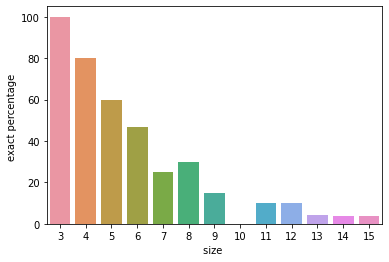

In [102]:
#### SIZE vs. exact precission 
sns.barplot(x = "size", y = str(cols_expected[-1]), data = results_needed_noise_level, ci=None )
###### customize the plot:
plt.xlabel("size ")
plt.ylabel("exact percentage ")
plt.savefig("numsize_vs_exact_correct_noise" + str(NOISE_LEVEL).replace( ".", "_" ) + ".eps")